In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Dense
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
encoder = OneHotEncoder()
encoder.fit([[0],[1]])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [6]:
x = []
y = []
paths = []

for r,d,f in os.walk(r'/content/drive/MyDrive/Brain_tumor_classification/brain_tumor_dataset/yes'):
    for file in f:
        paths.append(os.path.join(r, file))
        #   Lưu hết tất cả các link image trong yes vào paths

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if img.shape == (128,128,3) :
        x.append(np.array(img))
        y.append(encoder.transform([[1]]).toarray())

KeyboardInterrupt: ignored

In [ ]:
paths = []

for r,d,f in os.walk(r'/content/drive/MyDrive/Brain_tumor_classification/brain_tumor_dataset/no'):
    for file in f:
        paths.append(os.path.join(r,file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if img.shape == (128,128,3):
        x.append(np.array(img))
        y.append(encoder.transform([[0]]).toarray())

In [ ]:
x = np.array(x)
x.shape

(2891, 128, 128, 3)

In [ ]:
y = np.array(y)
y = y.reshape(2891,2)
y.shape

(2891, 2)

In [ ]:
np.save('/content/drive/MyDrive/Brain_tumor_classification/brain_tumor_dataset/x.npy', x)
np.save('/content/drive/MyDrive/Brain_tumor_classification/brain_tumor_dataset/y.npy', y)

In [7]:
x = np.load('/content/drive/MyDrive/Brain_tumor_classification/brain_tumor_dataset/x.npy')
y = np.load('/content/drive/MyDrive/Brain_tumor_classification/brain_tumor_dataset/y.npy')

In [8]:
x.shape

(2891, 128, 128, 3)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 0)


In [10]:
x_train.shape


(2312, 128, 128, 3)

In [13]:
model = Sequential()
model.add(Conv2D(32, (2,2), input_shape = (128,128,3), padding = 'same'))
model.add(Conv2D(32, (2,2), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(2,2), activation='relu', padding='same'))
model.add(Conv2D(64,(2,2), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'Adamax', metrics = ['accuracy'])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 128, 128, 32)      416       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 128, 128, 32)      4128      
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 64)       

In [27]:
demo_datagen = ImageDataGenerator(rescale=1./255,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip = True)


In [21]:
os.mkdir('/content/drive/MyDrive/Brain_tumor_classification/brain_tumor_dataset/preview')

In [29]:
x = x_train[0]
x  = x.reshape((1,) + x.shape)
i = 0
for batch in demo_datagen.flow(x, batch_size=1, save_to_dir='/content/drive/MyDrive/Brain_tumor_classification/brain_tumor_dataset/preview', save_prefix='/content/drive/MyDrive/Brain_tumor_classification/brain_tumor_dataset/preview/aug_image', save_format='jpg'):
    i += 1
    if i > 20:
        break

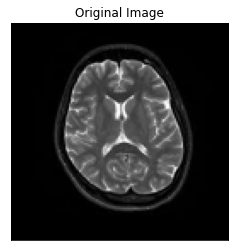

In [38]:
import cv2
plt.imshow(x_train[0])
plt.xticks([])
plt.yticks([])
plt.title('Original Image')
plt.show()

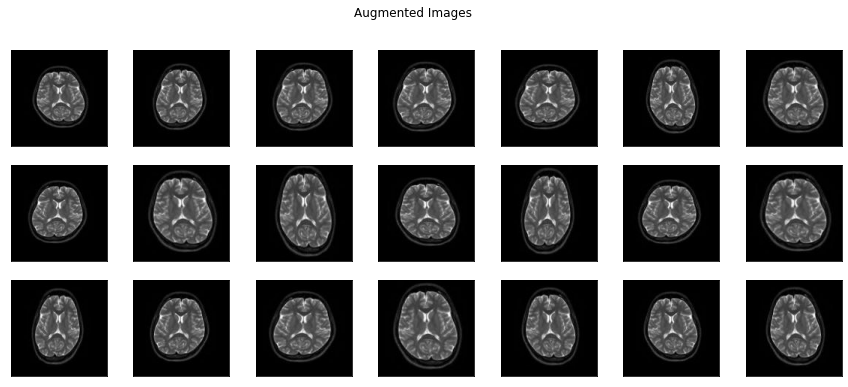

In [40]:
plt.figure(figsize=(15,6))
i = 1
for img in os.listdir('/content/drive/MyDrive/Brain_tumor_classification/brain_tumor_dataset/preview/'):
    img = cv2.cv2.imread('/content/drive/MyDrive/Brain_tumor_classification/brain_tumor_dataset/preview/' + img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3,7,i)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    i += 1
    if i > 21:
        break
plt.suptitle('Augmented Images')
plt.show()

In [ ]:
history = model.fit(
    x,
    y, 
    epochs = 20, 
    batch_size = 50, 
    verbose = 1,
    validation_data = (x_test, y_test)
)

Epoch 1/20
58/58 [==============================] - 179s 3s/step - loss: 5.8431 - accuracy: 0.7769 - val_loss: 1.2910 - val_accuracy: 0.8532
Epoch 2/20
58/58 [==============================] - 176s 3s/step - loss: 0.4846 - accuracy: 0.8741 - val_loss: 0.1719 - val_accuracy: 0.9482
Epoch 3/20
58/58 [==============================] - 176s 3s/step - loss: 0.1929 - accuracy: 0.9360 - val_loss: 0.1093 - val_accuracy: 0.9724
Epoch 4/20
58/58 [==============================] - 178s 3s/step - loss: 0.1237 - accuracy: 0.9581 - val_loss: 0.0892 - val_accuracy: 0.9706
Epoch 5/20
58/58 [==============================] - 176s 3s/step - loss: 0.0988 - accuracy: 0.9685 - val_loss: 0.0719 - val_accuracy: 0.9793
Epoch 6/20
58/58 [==============================] - 174s 3s/step - loss: 0.0814 - accuracy: 0.9758 - val_loss: 0.0806 - val_accuracy: 0.9706
Epoch 7/20
58/58 [==============================] - 171s 3s/step - loss: 0.0620 - accuracy: 0.9810 - val_loss: 0.0462 - val_accuracy: 0.9862
Epoch 8/20
58

In [ ]:
model.save('/content/drive/MyDrive/Brain_tumor_classification/brain_tumor_dataset/brain_tumor_classification.hdf5')

In [ ]:
model = load_model('/content/drive/MyDrive/Brain_tumor_classification/brain_tumor_dataset/brain_tumor_classification.hdf5')


In [ ]:
test_brain = Image.open()

TypeError: ignored